In [89]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt 

symbol = 'QQQ'
spy = yf.Ticker(symbol)



Get price history and 
Show meta information of history information

In [90]:
prices = spy.history(period="max")
print(prices.head)

<bound method NDFrame.head of                                  Open        High         Low       Close  \
Date                                                                        
1999-03-10 00:00:00-05:00   43.531519   43.558128   42.813089   43.478302   
1999-03-11 00:00:00-05:00   43.797608   44.050388   42.839701   43.691174   
1999-03-12 00:00:00-05:00   43.531516   43.558125   42.280917   42.626827   
1999-03-15 00:00:00-05:00   42.946126   43.904032   42.493781   43.850815   
1999-03-16 00:00:00-05:00   44.037072   44.409591   43.558119   44.223331   
...                               ...         ...         ...         ...   
2024-08-19 00:00:00-04:00  475.170013  481.309998  473.369995  481.269989   
2024-08-20 00:00:00-04:00  480.350006  482.940002  478.549988  480.260010   
2024-08-21 00:00:00-04:00  481.049988  484.369995  479.320007  482.500000   
2024-08-22 00:00:00-04:00  484.839996  485.540009  473.809998  474.850006   
2024-08-23 00:00:00-04:00  479.250000  482.730

In [91]:

monthly_prices = prices.resample('ME').last()

print(monthly_prices)

                                 Open        High         Low       Close  \
Date                                                                        
1999-03-31 00:00:00-05:00   46.085937   46.139154   44.542643   44.675686   
1999-04-30 00:00:00-04:00   46.085931   46.325408   44.116902   45.740021   
1999-05-31 00:00:00-04:00   43.850817   44.542638   43.292038   44.303162   
1999-06-30 00:00:00-04:00   48.367628   51.035131   47.795544   49.066101   
1999-07-31 00:00:00-04:00   48.640329   49.172499   48.114811   48.187984   
...                               ...         ...         ...         ...   
2024-04-30 00:00:00-04:00  430.465786  431.873552  423.836339  423.916199   
2024-05-31 00:00:00-04:00  451.063060  451.761962  442.356897  449.994751   
2024-06-30 00:00:00-04:00  482.410004  487.200012  478.459991  479.109985   
2024-07-31 00:00:00-04:00  467.869995  472.790009  466.410004  471.070007   
2024-08-31 00:00:00-04:00  479.250000  482.730011  475.279999  480.000000   

Calculate return monthly

In [92]:
monthly_returns = monthly_prices['Close'].pct_change().dropna()
monthly_returns.name = 'Return'
print(monthly_returns)

Date
1999-04-30 00:00:00-04:00    0.023824
1999-05-31 00:00:00-04:00   -0.031414
1999-06-30 00:00:00-04:00    0.107508
1999-07-31 00:00:00-04:00   -0.017897
1999-08-31 00:00:00-04:00    0.054666
                               ...   
2024-04-30 00:00:00-04:00   -0.043738
2024-05-31 00:00:00-04:00    0.061518
2024-06-30 00:00:00-04:00    0.064701
2024-07-31 00:00:00-04:00   -0.016781
2024-08-31 00:00:00-04:00    0.018957
Freq: ME, Name: Return, Length: 305, dtype: float64


Calculate average return of all positive return

In [93]:
positive_returns = monthly_returns[monthly_returns > 0]
average_positive_return = positive_returns.mean()

print(f"The average positive monthly return is {average_positive_return:.2%}")

The average positive monthly return is 5.26%


Plot it

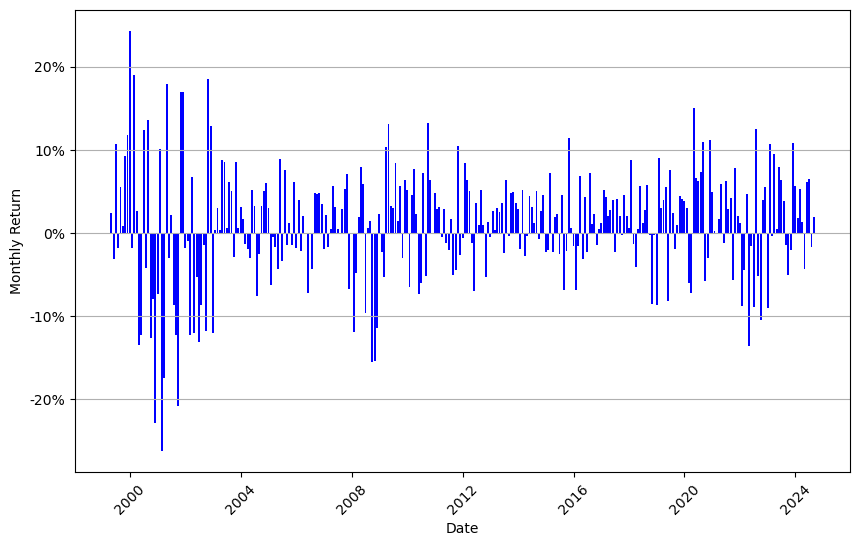

In [94]:
plt.figure(figsize=(10, 6))

plt.bar(monthly_returns.index, monthly_returns, color='b', width=25)
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.grid(axis='y')
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))

plt.show()

Show the return distribution

<Axes: title={'center': 'QQQ Monthly Return Distribution'}, ylabel='Frequency'>

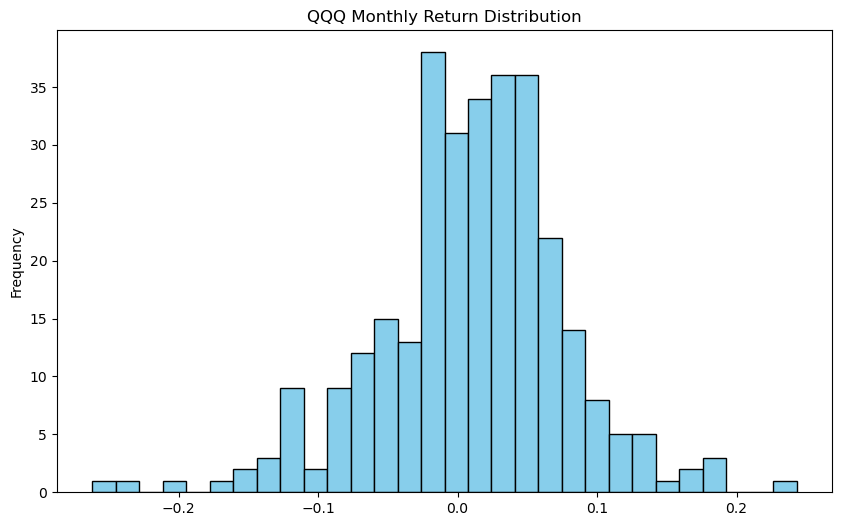

In [95]:
monthly_returns.plot(kind='hist', bins=30,title=f'{symbol} Monthly Return Distribution', color='skyblue', edgecolor='black', figsize=(10, 6))